In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
# using inspector
inspector = inspect(engine)
inspector.get_table_names()

# using Base
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# find what data/columns in table Measurement
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# N.B tobs = time of observation
#     prcp = precipitation

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


('2017-08-23',)

2016-08-23
Date:2016-08-23, Precipitation: 0.0
Date:2016-08-24, Precipitation: 2.0
Date:2016-08-25, Precipitation: 2.0
Date:2016-08-26, Precipitation: 0.0
Date:2016-08-27, Precipitation: 0.0
Date:2016-08-28, Precipitation: 0.3
Date:2016-08-29, Precipitation: 0.0
Date:2016-08-30, Precipitation: 0.0
Date:2016-08-31, Precipitation: 3.3
Date:2016-09-01, Precipitation: 0.0
Date:2016-09-02, Precipitation: 0.0
Date:2016-09-03, Precipitation: 0.0
Date:2016-09-04, Precipitation: 0.8
Date:2016-09-05, Precipitation: None
Date:2016-09-06, Precipitation: None
Date:2016-09-07, Precipitation: 1.3
Date:2016-09-08, Precipitation: 0.0
Date:2016-09-09, Precipitation: 0.8
Date:2016-09-10, Precipitation: 0.0
Date:2016-09-11, Precipitation: 1.3
Date:2016-09-12, Precipitation: 0.0
Date:2016-09-13, Precipitation: 0.5
Date:2016-09-14, Precipitation: 33.5
Date:2016-09-15, Precipitation: 10.7
Date:2016-09-16, Precipitation: 1.5
Date:2016-09-17, Precipitation: 1.3
Date:2016-09-18, Precipitation: 0.0
Date:2016-09-

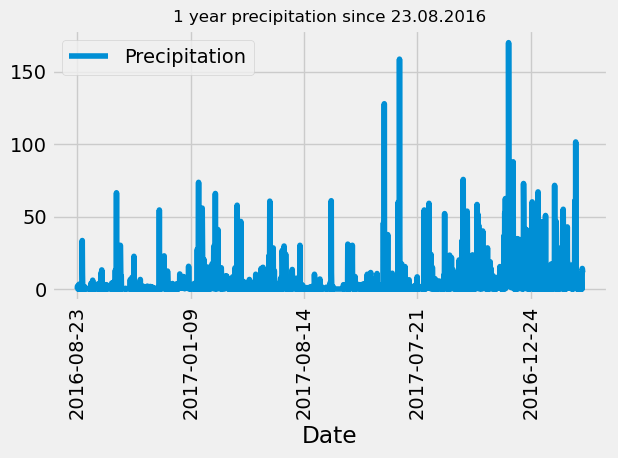

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
last_year = recent_year - dt.timedelta(days=365)
print(last_year)
# Perform a query to retrieve the data and precipitation scores

prcp_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=last_year).all()

for date, prcp in prcp_scores:
    print(f"Date:{date}, Precipitation: {prcp}")
# # Save the query results as a Pandas DataFrame. Explicitly set the column names
# column_names = ['Date','Precipitation']
prcp_scores_df = pd.DataFrame(prcp_scores, columns=['Date','Precipitation'])
prcp_scores_df.set_index('Date', inplace=True)
prcp_scores_df['Precipitation'].fillna(0.0, inplace=True)
# # Sort the dataframe by date
prcp_scores_df.sort_values(by='Date', ascending=True)
prcp_scores_df.head()
# # Use Pandas Plotting with Matplotlib to plot the data

prcp_scores_df.reset_index().plot(x='Date', y='Precipitation',kind='line', rot=90)
plt.title("1 year precipitation since 23.08.2016", fontsize = 12)
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_scores_df.describe()

,Precipitation
count,2230.000000
mean,4.083587
std,11.227915
min,0.000000
25%,0.000000
50%,0.300000
75%,2.800000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

stations = session.query(Station.station).count()
print(f"Total number of stations in the dataset: {stations}") # 9 stations

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
Total number of stations in the dataset: 9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Most active is USC00519281
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(12.2, 29.4, 22.03582251082252)]

<Axes: ylabel='Frequency'>

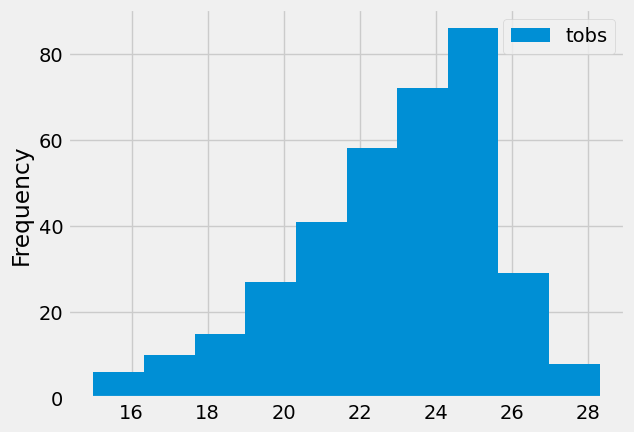

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temparature_tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= last_year).all()

temparature_tobs_df = pd.DataFrame(temparature_tobs)
temparature_tobs_df.plot.hist()

# Close Session

In [ ]:
# Close Session
session.close()